### 진행과정
- 데이터 : wine데이터
- 데이터 시각화(각 컬럼별 boxplot그려보기)
- 분류 내용 : 맛이 있는지 없는지(quality 컬럼이용)
- 모델링 : decision tree 사용
    - pipeline 이용 : scaler,clf 지정
    - 하이퍼 파라미터 튜닝 : gridsearch 이용
- 성능평가 : roc 그래프,교차검증
- 모델시각화 : graphviz

In [3]:
#데이터 읽기
red_url='https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-red.csv'
white_url='https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-white.csv'

red_wine=pd.read_csv(red_url,sep=';')
white_wine=pd.read_csv(white_url,sep=';')

red_wine['color']=1.0
white_wine['color']=0.

wine=pd.concat([red_wine,white_wine])
wine['taste']=[1.0 if quality>5 else 0 for quality in wine['quality']]

X=wine.drop(['quality','taste'],axis=1)
y=wine['taste']

In [4]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color', 'taste'],
      dtype='object')

In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   float64
 13  taste                 6497 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 761.4 KB


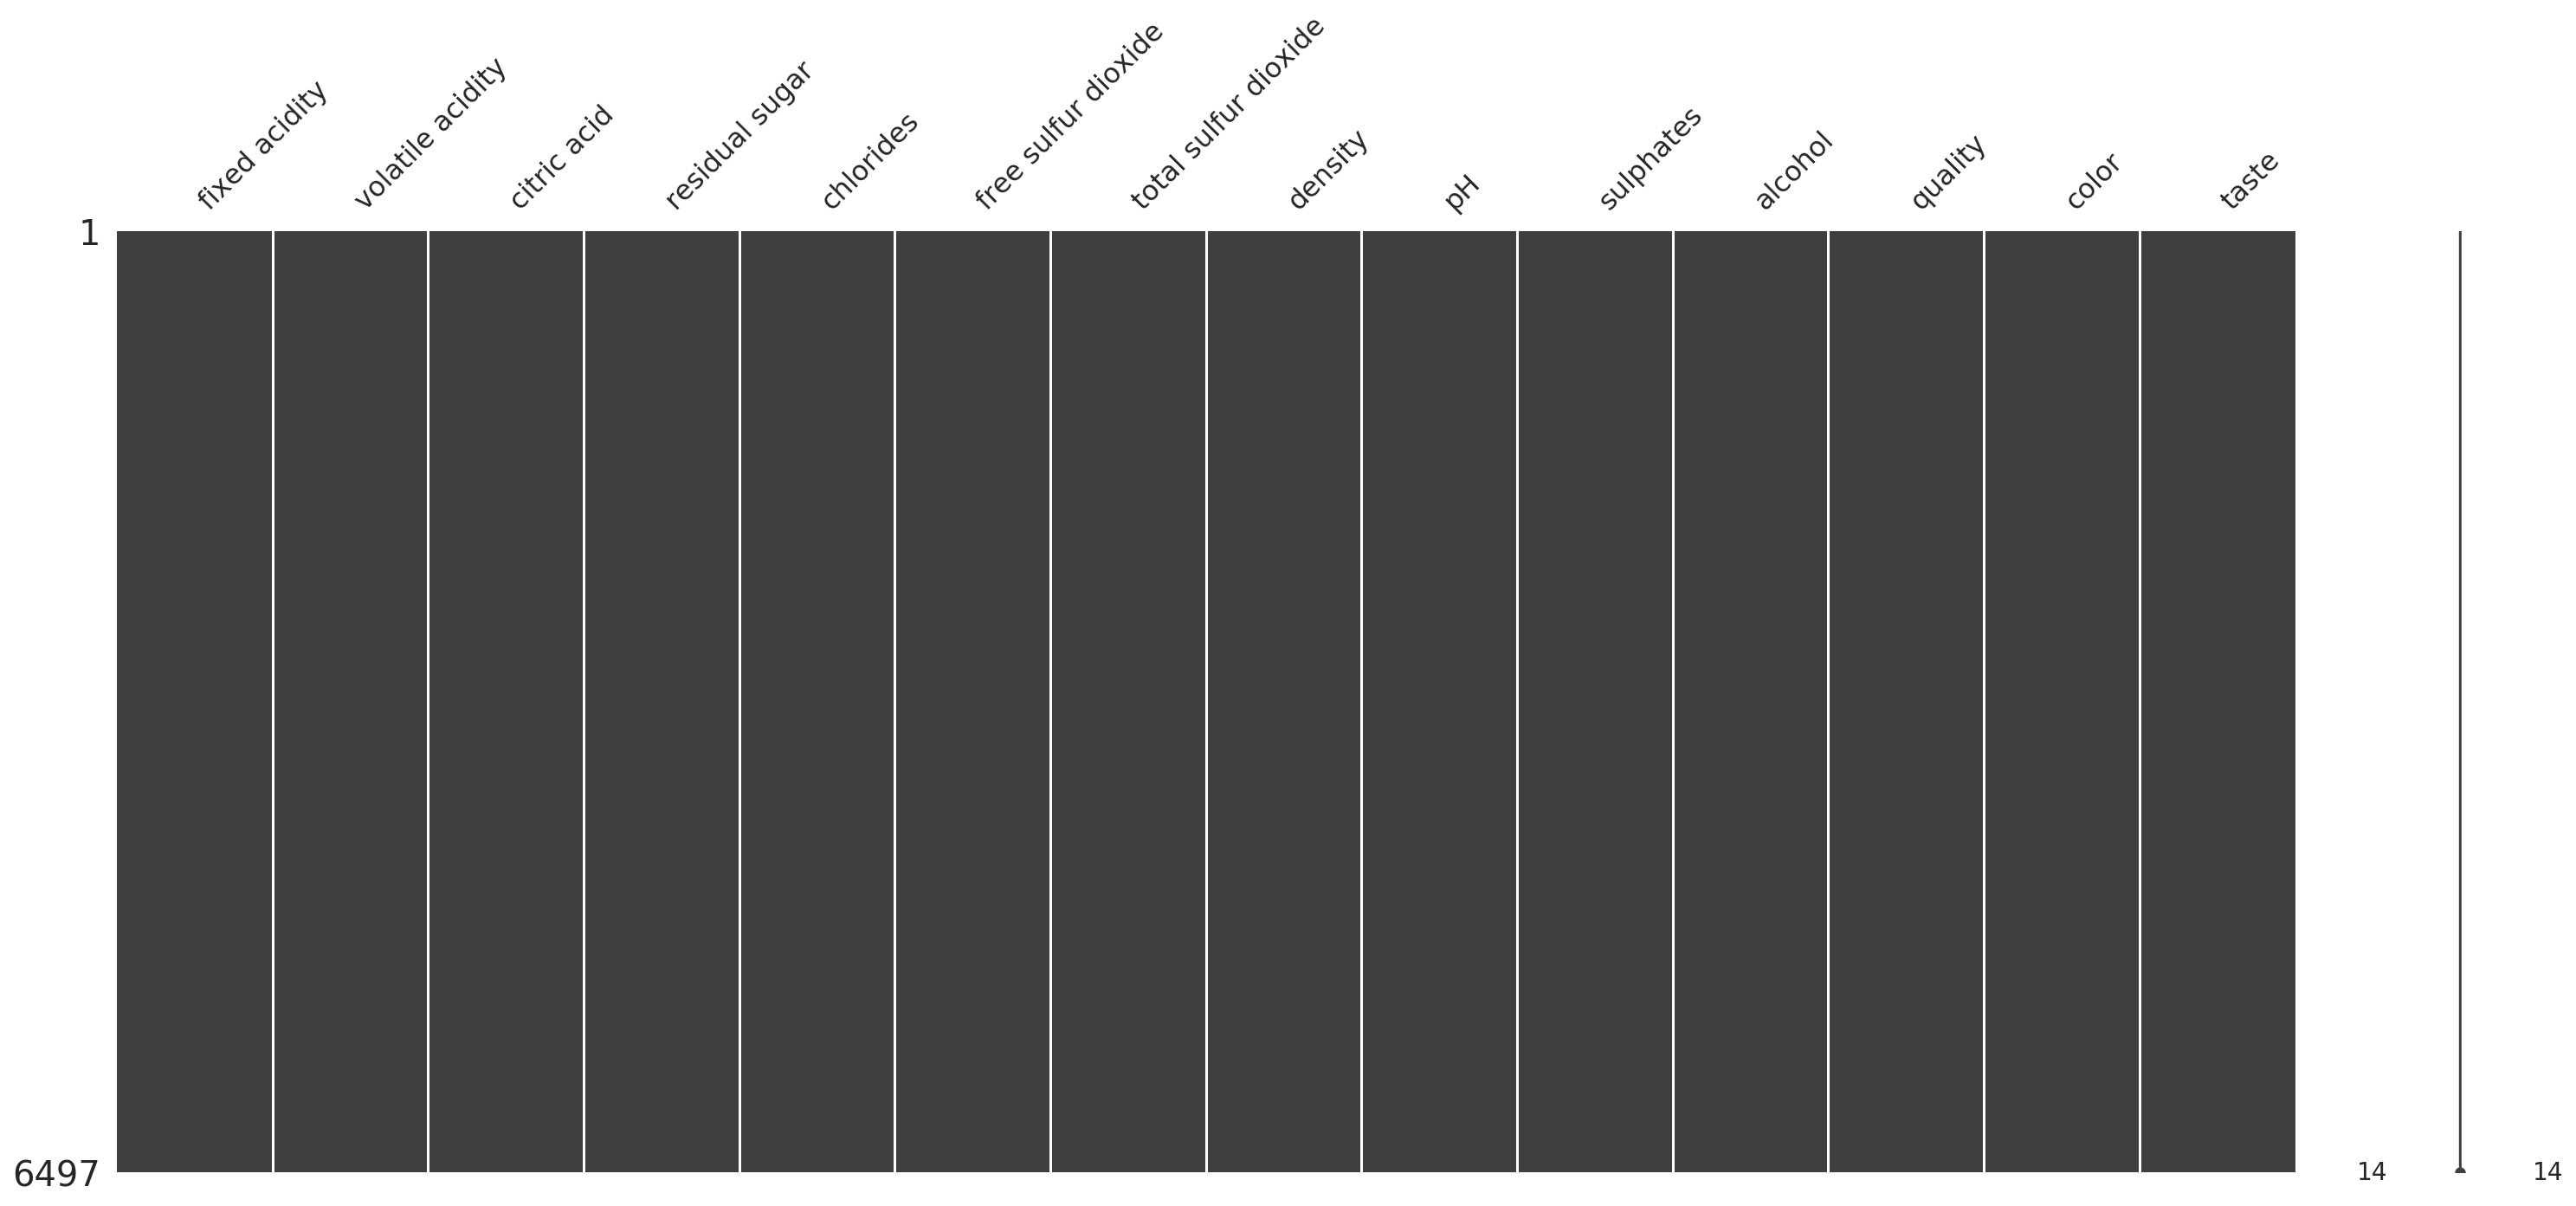

In [8]:
#널값 확인
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
msno.matrix(wine)

In [23]:
#모든 변수가 실수형이기 때문에 scale이 필요할 것으로 보인다.
#변수를 boxplot으로 확인해 보겠음

import plotly.express as px
import plotly.graph_objects as go

fig=go.Figure()
fig.add_trace(go.Box(y=X['fixed acidity'], name='fixed acidity'))
fig.add_trace(go.Box(y=X['volatile acidity'],name='volatile acidity'))
fig.add_trace(go.Box(y=X['chlorides'], name='chlorides'))

In [32]:
#모델링
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=27)

estimator=[('scaler',StandardScaler()),('clf',DecisionTreeClassifier(max_depth=2,random_state=27))]
pipe=Pipeline(estimator)

In [36]:
#하이퍼파라미터 튜닝
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

params={'clf__max_depth':[2,4,6]}
grid_search=GridSearchCV(estimator=pipe,param_grid=params)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=2,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                     

In [37]:
grid_search.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=6,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=27,
                                        splitter='best'))],
         verbose=False)

In [43]:
#성능평가
from sklearn.metrics import (accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve)

y_pred_te=grid_search.predict(X_test)
print('accuracy: ',accuracy_score(y_test,y_pred_te))
print('precision: ',precision_score(y_test,y_pred_te))
print('recall : ',recall_score(y_test,y_pred_te))
print('f1_score: ',f1_score(y_test,y_pred_te))
print('roc_auc_score: ',roc_auc_score(y_test,y_pred_te))

accuracy:  0.7246153846153847
precision:  0.7838827838827839
recall :  0.7800729040097205
f1_score:  0.781973203410475
roc_auc_score:  0.7045018608098917


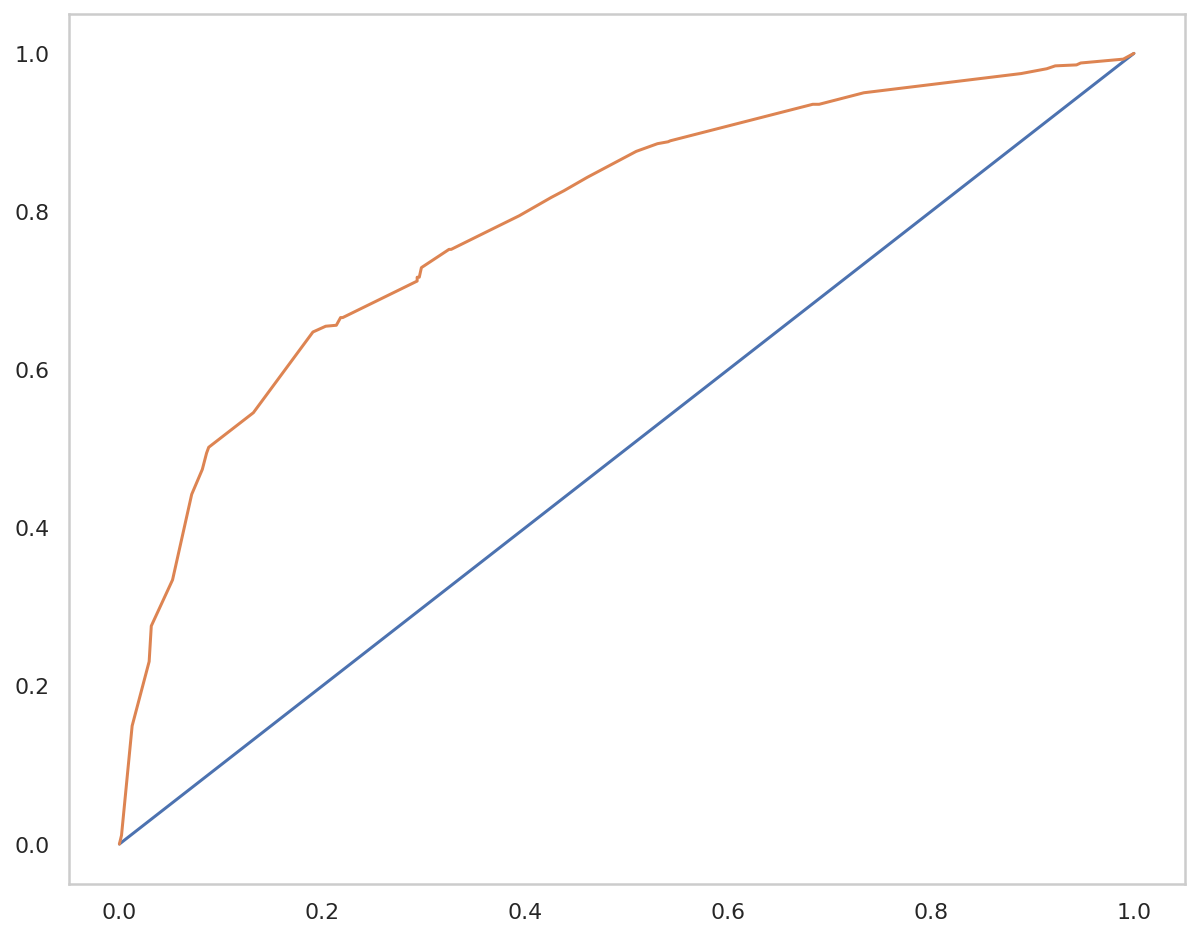

In [46]:
#roc 커브 그리기
pred_proba=grid_search.predict_proba(X_test)[:,1] #1이라고 예측한 확률만 빼기
fpr,tpr,thresholds=roc_curve(y_test,pred_proba)

plt.figure(figsize=(10,8))
plt.plot([0,1])
plt.plot(fpr,tpr)
plt.grid()
plt.show()

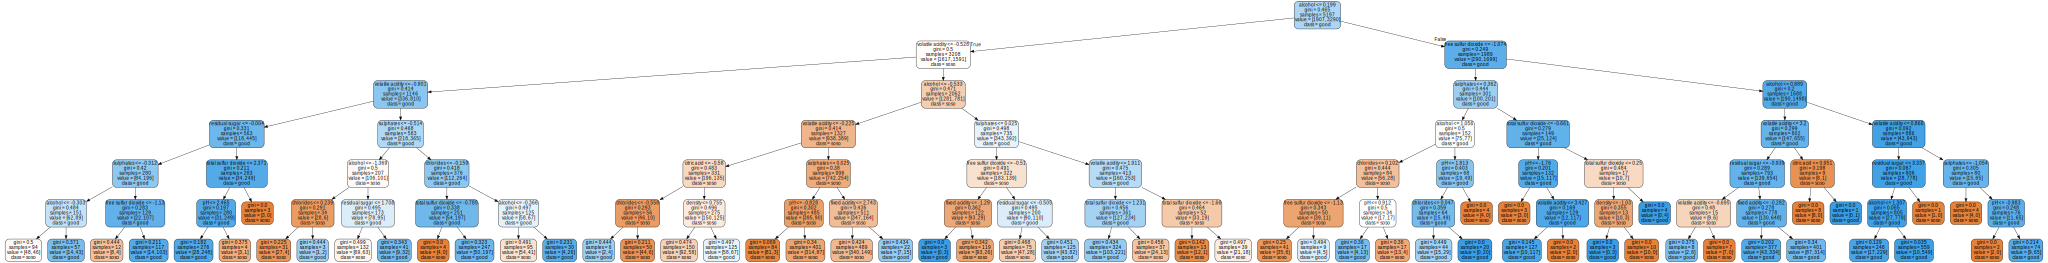

In [51]:
#모델 시각화
from graphviz import Source
from sklearn.tree import export_graphviz

Source(export_graphviz(grid_search.best_estimator_['clf'],feature_names=X_train.columns,class_names=['soso','good'],\
                      filled=True,rounded=True))
